##1.Setup and Imports

In [1]:
import pandas as pd
import io
import numpy as np
pd.set_option('display.max_columns', None)
import ast
from scipy import stats

##2.Data Loading and Preprocessing

In [ ]:
# Loading data from a CSV file named 'usual_features.csv' into a pandas DataFrame
data = pd.read_csv('usual_features.csv')

In [ ]:
data.head()

,ABP_SPeaks,ABP_Turns,Age,CaseID,ECG_RPeaks,Gender,IncludeFlag,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File
0,"[0.9750613658431216, 0.7654876957523871, 0.997...","[0.01696765687016835, 0.18744358800598918, 0.0...",71.0,50,"[0.7191176470588234, 0.7294117647058822, 0.702...",70,1,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat
1,"[0.9823791863807526, 0.7934358823782229, 0.995...","[0.0035018500185447503, 0.16256920654809193, 0...",71.0,50,"[0.7245508982035928, 0.7245508982035928, 0.727...",70,1,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat
2,"[0.9041607967198663, 0.7059875839051473, 0.930...","[0.13552766996771687, 0.27833405577550446, 0.1...",71.0,50,"[0.7241887905604719, 0.6607669616519174, 0.731...",70,1,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat
3,"[0.9700609329062179, 0.7592603624094446, 0.960...","[0.024815747052892558, 0.188819183066916, 0.01...",71.0,50,"[0.733528550512445, 0.7115666178623719, 0.7115...",70,1,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat
4,"[0.7338105114630865, 0.9900867984029613, 0.757...","[0.0021608079864819684, 0.1789342597026248, 0....",71.0,50,"[0.729766803840878, 0.7503429355281207, 0.7270...",70,1,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat


In [ ]:
data.shape

(943, 16)

**1.Empty List Detection**

In [ ]:
# Calculating the number of missing values in each column
missing_values = data.isnull().sum()

missing_values

ABP_SPeaks     0
ABP_Turns      0
Age            0
CaseID         0
ECG_RPeaks     0
Gender         0
IncludeFlag    0
PPG_SPeaks     0
PPG_Turns      0
SegDBP         0
SegSBP         0
SegmentID      0
SubjectID      0
WinID          0
WinSeqID       0
File           0
dtype: int64

In [ ]:
# Function to safely parse a string representation of a list and check if it's empty
def is_empty_list(column_value):
    try:
        # Parse the string to a list
        list_value = ast.literal_eval(column_value)
        # Check if the parsed list is empty
        return len(list_value) == 0
    except:
        # If parsing fails, treat it as an empty list
        return True

# Apply this function to each of the specified columns
empty_counts = {
    'ABP_SPeaks_Empty': data['ABP_SPeaks'].apply(is_empty_list).sum(),
    'ABP_Turns_Empty': data['ABP_Turns'].apply(is_empty_list).sum(),
    'ECG_RPeaks_Empty': data['ECG_RPeaks'].apply(is_empty_list).sum(),
    'PPG_SPeaks_Empty': data['PPG_SPeaks'].apply(is_empty_list).sum(),
    'PPG_Turns_Empty': data['PPG_Turns'].apply(is_empty_list).sum()
}

empty_counts


{'ABP_SPeaks_Empty': 18,
 'ABP_Turns_Empty': 12,
 'ECG_RPeaks_Empty': 12,
 'PPG_SPeaks_Empty': 6,
 'PPG_Turns_Empty': 13}

In [ ]:
# Columns to check for empty arrays
columns_to_check = ['ABP_SPeaks', 'ABP_Turns', 'ECG_RPeaks', 'PPG_SPeaks', 'PPG_Turns']

# Identify rows with empty arrays in any of the specified columns
rows_with_empty_arrays = data[columns_to_check].applymap(is_empty_list).any(axis=1)

# Remove these rows from the DataFrame
data = data[~rows_with_empty_arrays]

In [ ]:
# Apply this function to each of the specified columns
empty_counts = {
    'ABP_SPeaks_Empty': data['ABP_SPeaks'].apply(is_empty_list).sum(),
    'ABP_Turns_Empty': data['ABP_Turns'].apply(is_empty_list).sum(),
    'ECG_RPeaks_Empty': data['ECG_RPeaks'].apply(is_empty_list).sum(),
    'PPG_SPeaks_Empty': data['PPG_SPeaks'].apply(is_empty_list).sum(),
    'PPG_Turns_Empty': data['PPG_Turns'].apply(is_empty_list).sum()
}

empty_counts

{'ABP_SPeaks_Empty': 0,
 'ABP_Turns_Empty': 0,
 'ECG_RPeaks_Empty': 0,
 'PPG_SPeaks_Empty': 0,
 'PPG_Turns_Empty': 0}

**2. Transforming Peaks into columns of features**

In [ ]:
# Function to safely parse the string representation of a list
def safe_parse_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return None

# Apply the function to 'PPG_SPeaks', 'ABP_SPeaks', and 'ECG_RPeaks'
data['PPG_SPeaks_Parsed'] = data['PPG_SPeaks'].apply(safe_parse_list)
data['ABP_SPeaks_Parsed'] = data['ABP_SPeaks'].apply(safe_parse_list)
data['ECG_RPeaks_Parsed'] = data['ECG_RPeaks'].apply(safe_parse_list)

# Filter out any rows where the parsing failed
data = data.dropna(subset=['PPG_SPeaks_Parsed', 'ABP_SPeaks_Parsed', 'ECG_RPeaks_Parsed'])

# Calculate the length of each valid list and check if all lengths are the same
length_counts_ppg = data['PPG_SPeaks_Parsed'].apply(lambda x: len(x) if x is not None else 0).value_counts()
length_counts_abp = data['ABP_SPeaks_Parsed'].apply(lambda x: len(x) if x is not None else 0).value_counts()
length_counts_ecg = data['ECG_RPeaks_Parsed'].apply(lambda x: len(x) if x is not None else 0).value_counts()

# Check if all lengths are the same within each column
all_same_length_ppg = length_counts_ppg.size == 1
all_same_length_abp = length_counts_abp.size == 1
all_same_length_ecg = length_counts_ecg.size == 1

# Results
all_same_length_ppg, length_counts_ppg.head(), all_same_length_abp, length_counts_abp.head(), all_same_length_ecg, length_counts_ecg.head()


(False,
 15    146
 16    131
 14    122
 17    109
 13     82
 Name: PPG_SPeaks_Parsed, dtype: int64,
 False,
 14    144
 16    144
 15    133
 17    119
 11     91
 Name: ABP_SPeaks_Parsed, dtype: int64,
 False,
 16    135
 15    129
 17    125
 14    121
 11     88
 Name: ECG_RPeaks_Parsed, dtype: int64)

In [ ]:
# Modified function to standardize the list length based on a specified number of peaks
def standardize_peaks(row, num_peaks):
    try:
        peaks = ast.literal_eval(row)
    except:
        peaks = []

    # Ensure the length is exactly num_peaks
    return peaks[:num_peaks] + [None] * (num_peaks - len(peaks)) if len(peaks) < num_peaks else peaks[:num_peaks]

# Specify the number of peaks for each column
num_peaks_ppg = 10
num_peaks_abp = 10
num_peaks_ecg = 10

# Apply the function to each column with the specified number of peaks
data['PPG_SPeaks_Standardized'] = data['PPG_SPeaks'].apply(lambda x: standardize_peaks(x, num_peaks_ppg))
data['ABP_SPeaks_Standardized'] = data['ABP_SPeaks'].apply(lambda x: standardize_peaks(x, num_peaks_abp))
data['ECG_RPeaks_Standardized'] = data['ECG_RPeaks'].apply(lambda x: standardize_peaks(x, num_peaks_ecg))

# Create individual columns for each peak for each feature
for i in range(num_peaks_ppg):
    data[f'PPG_Peak_{i+1}'] = data['PPG_SPeaks_Standardized'].apply(lambda x: x[i])
for i in range(num_peaks_abp):
    data[f'ABP_Peak_{i+1}'] = data['ABP_SPeaks_Standardized'].apply(lambda x: x[i])
for i in range(num_peaks_ecg):
    data[f'ECG_Peak_{i+1}'] = data['ECG_RPeaks_Standardized'].apply(lambda x: x[i])

# Optionally, drop the intermediate columns
data.drop(['PPG_SPeaks_Standardized', 'ABP_SPeaks_Standardized', 'ECG_RPeaks_Standardized'], axis=1, inplace=True)

data.head()


,ABP_SPeaks,ABP_Turns,Age,CaseID,ECG_RPeaks,Gender,IncludeFlag,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File,PPG_SPeaks_Parsed,ABP_SPeaks_Parsed,ECG_RPeaks_Parsed,PPG_Peak_1,PPG_Peak_2,PPG_Peak_3,PPG_Peak_4,PPG_Peak_5,PPG_Peak_6,PPG_Peak_7,PPG_Peak_8,PPG_Peak_9,PPG_Peak_10,ABP_Peak_1,ABP_Peak_2,ABP_Peak_3,ABP_Peak_4,ABP_Peak_5,ABP_Peak_6,ABP_Peak_7,ABP_Peak_8,ABP_Peak_9,ABP_Peak_10,ECG_Peak_1,ECG_Peak_2,ECG_Peak_3,ECG_Peak_4,ECG_Peak_5,ECG_Peak_6,ECG_Peak_7,ECG_Peak_8,ECG_Peak_9,ECG_Peak_10
0,"[0.9750613658431216, 0.7654876957523871, 0.997...","[0.01696765687016835, 0.18744358800598918, 0.0...",71.0,50,"[0.7191176470588234, 0.7294117647058822, 0.702...",70,1,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat,"[0.9867891412811203, 0.5711304022724234, 0.975...","[0.9750613658431216, 0.7654876957523871, 0.997...","[0.7191176470588234, 0.7294117647058822, 0.702...",0.986789,0.571130,0.975515,0.542162,0.899702,0.607524,0.937705,0.614518,0.981782,0.571557,0.975061,0.765488,0.997464,0.773466,0.958671,0.793478,0.966959,0.806777,0.979167,0.741045,0.719118,0.729412,0.702941,0.726471,0.726471,0.741176,0.752941,0.707353,0.744118,0.755882
1,"[0.9823791863807526, 0.7934358823782229, 0.995...","[0.0035018500185447503, 0.16256920654809193, 0...",71.0,50,"[0.7245508982035928, 0.7245508982035928, 0.727...",70,1,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat,"[0.9468193882212245, 0.6396412868569045, 0.991...","[0.9823791863807526, 0.7934358823782229, 0.995...","[0.7245508982035928, 0.7245508982035928, 0.727...",0.946819,0.639641,0.991002,0.603517,0.973558,0.626651,0.975852,0.590678,0.956493,0.552410,0.982379,0.793436,0.995721,0.778460,0.972956,0.794660,0.979972,0.770546,0.963598,0.770224,0.724551,0.724551,0.727545,0.697605,0.720060,0.727545,0.751497,0.717066,0.705090,0.758982
2,"[0.9041607967198663, 0.7059875839051473, 0.930...","[0.13552766996771687, 0.27833405577550446, 0.1...",71.0,50,"[0.7241887905604719, 0.6607669616519174, 0.731...",70,1,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat,"[0.9162292190775887, 0.570549439986936, 0.9449...","[0.9041607967198663, 0.7059875839051473, 0.930...","[0.7241887905604719, 0.6607669616519174, 0.731...",0.916229,0.570549,0.944956,0.546040,0.958860,0.622132,0.939083,0.645081,0.964335,0.634627,0.904161,0.705988,0.930296,0.635222,0.869024,0.756534,0.908135,0.685691,0.870452,0.745502,0.724189,0.660767,0.731563,0.750737,0.713864,0.697640,0.694690,0.765487,0.735988,0.721239
3,"[0.9700609329062179, 0.7592603624094446, 0.960...","[0.024815747052892558, 0.188819183066916, 0.01...",71.0,50,"[0.733528550512445, 0.7115666178623719, 0.7115...",70,1,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat,"[0.9403660783004165, 0.5716904735546338, 0.926...","[0.9700609329062179, 0.7592603624094446, 0.960...","[0.733528550512445, 0.7115666178623719, 0.7115...",0.940366,0.571690,0.926420,0.561424,0.953283,0.562799,0.999431,0.494172,0.920434,0.521347,0.970061,0.759260,0.960049,0.759857,0.977998,0.766237,0.998940,0.743742,0.989649,0.752707,0.733529,0.711567,0.711567,0.733529,0.737921,0.774524,0.752562,0.707174,0.715959,0.730600
4,"[0.7338105114630865, 0.9900867984029613, 0.757...","[0.0021608079864819684, 0.1789342597026248, 0....",71.0,50,"[0.729766803840878, 0.7503429355281207, 0.7270...",70,1,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat,"[0.913079259084399, 0.5157356524267441, 0.9729...","[0.7338105114630865, 0.

In [ ]:
data.drop(['PPG_SPeaks', 'ABP_SPeaks', 'ECG_RPeaks','PPG_SPeaks_Parsed','ABP_SPeaks_Parsed','ECG_RPeaks_Parsed'], axis=1, inplace=True)

In [ ]:
data.head()

,ABP_Turns,Age,CaseID,Gender,IncludeFlag,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File,PPG_Peak_1,PPG_Peak_2,PPG_Peak_3,PPG_Peak_4,PPG_Peak_5,PPG_Peak_6,PPG_Peak_7,PPG_Peak_8,PPG_Peak_9,PPG_Peak_10,ABP_Peak_1,ABP_Peak_2,ABP_Peak_3,ABP_Peak_4,ABP_Peak_5,ABP_Peak_6,ABP_Peak_7,ABP_Peak_8,ABP_Peak_9,ABP_Peak_10,ECG_Peak_1,ECG_Peak_2,ECG_Peak_3,ECG_Peak_4,ECG_Peak_5,ECG_Peak_6,ECG_Peak_7,ECG_Peak_8,ECG_Peak_9,ECG_Peak_10
0,"[0.01696765687016835, 0.18744358800598918, 0.0...",71.0,50,70,1,"[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat,0.986789,0.571130,0.975515,0.542162,0.899702,0.607524,0.937705,0.614518,0.981782,0.571557,0.975061,0.765488,0.997464,0.773466,0.958671,0.793478,0.966959,0.806777,0.979167,0.741045,0.719118,0.729412,0.702941,0.726471,0.726471,0.741176,0.752941,0.707353,0.744118,0.755882
1,"[0.0035018500185447503, 0.16256920654809193, 0...",71.0,50,70,1,"[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat,0.946819,0.639641,0.991002,0.603517,0.973558,0.626651,0.975852,0.590678,0.956493,0.552410,0.982379,0.793436,0.995721,0.778460,0.972956,0.794660,0.979972,0.770546,0.963598,0.770224,0.724551,0.724551,0.727545,0.697605,0.720060,0.727545,0.751497,0.717066,0.705090,0.758982
2,"[0.13552766996771687, 0.27833405577550446, 0.1...",71.0,50,70,1,"[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat,0.916229,0.570549,0.944956,0.546040,0.958860,0.622132,0.939083,0.645081,0.964335,0.634627,0.904161,0.705988,0.930296,0.635222,0.869024,0.756534,0.908135,0.685691,0.870452,0.745502,0.724189,0.660767,0.731563,0.750737,0.713864,0.697640,0.694690,0.765487,0.735988,0.721239
3,"[0.024815747052892558, 0.188819183066916, 0.01...",71.0,50,70,1,"[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat,0.940366,0.571690,0.926420,0.561424,0.953283,0.562799,0.999431,0.494172,0.920434,0.521347,0.970061,0.759260,0.960049,0.759857,0.977998,0.766237,0.998940,0.743742,0.989649,0.752707,0.733529,0.711567,0.711567,0.733529,0.737921,0.774524,0.752562,0.707174,0.715959,0.730600
4,"[0.0021608079864819684, 0.1789342597026248, 0....",71.0,50,70,1,"[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat,0.913079,0.515736,0.972904,0.555154,0.972864,0.649959,0.892354,0.604160,0.943959,0.668074,0.733811,0.990087,0.757279,0.995293,0.853248,0.944103,0.813729,0.958580,0.824311,0.990421,0.729767,0.750343,0.727023,0.729767,0.687243,0.750343,0.792867,0.750343,0.743484,0.768176


**3. Handling the Array columns**

**PPG_Turns and ABP_Turns**

In [ ]:
import pandas as pd
import numpy as np
import ast

# Assuming 'data' is your DataFrame

# Function to convert string representation of a list to a list
def convert_to_list(row):
    try:
        return ast.literal_eval(row)
    except:
        return np.nan  # Return NaN if parsing fails

# Apply the function to your columns
data['PPG_Turns'] = data['PPG_Turns'].apply(convert_to_list)
data['ABP_Turns'] = data['ABP_Turns'].apply(convert_to_list)

# Drop rows where conversion to list failed
data = data.dropna(subset=['PPG_Turns', 'ABP_Turns'])

# Statistical feature extraction
data['PPG_Turns_Mean'] = data['PPG_Turns'].apply(np.mean)
data['ABP_Turns_Mean'] = data['ABP_Turns'].apply(np.mean)

data['PPG_Turns_Std'] = data['PPG_Turns'].apply(np.std)
data['ABP_Turns_Std'] = data['ABP_Turns'].apply(np.std)

# Normalization (Min-Max Scaling)
data['PPG_Turns_Mean_Normalized'] = (data['PPG_Turns_Mean'] - data['PPG_Turns_Mean'].min()) / (data['PPG_Turns_Mean'].max() - data['PPG_Turns_Mean'].min())
data['ABP_Turns_Mean_Normalized'] = (data['ABP_Turns_Mean'] - data['ABP_Turns_Mean'].min()) / (data['ABP_Turns_Mean'].max() - data['ABP_Turns_Mean'].min())

# Optional: Additional transformations (e.g., log, square root)
# Ensure to handle cases where NaN or Inf might be introduced
data['PPG_Turns_Log'] = np.log1p(data['PPG_Turns_Mean'])
data['ABP_Turns_Log'] = np.log1p(data['ABP_Turns_Mean'])

data['PPG_Turns_Sqrt'] = np.sqrt(data['PPG_Turns_Mean'])
data['ABP_Turns_Sqrt'] = np.sqrt(data['ABP_Turns_Mean'])

# View the first few rows of the preprocessed data
data.head()


,ABP_Turns,Age,CaseID,Gender,IncludeFlag,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File,PPG_Peak_1,PPG_Peak_2,PPG_Peak_3,PPG_Peak_4,PPG_Peak_5,PPG_Peak_6,PPG_Peak_7,PPG_Peak_8,PPG_Peak_9,PPG_Peak_10,ABP_Peak_1,ABP_Peak_2,ABP_Peak_3,ABP_Peak_4,ABP_Peak_5,ABP_Peak_6,ABP_Peak_7,ABP_Peak_8,ABP_Peak_9,ABP_Peak_10,ECG_Peak_1,ECG_Peak_2,ECG_Peak_3,ECG_Peak_4,ECG_Peak_5,ECG_Peak_6,ECG_Peak_7,ECG_Peak_8,ECG_Peak_9,ECG_Peak_10,PPG_Turns_Mean,ABP_Turns_Mean,PPG_Turns_Std,ABP_Turns_Std,PPG_Turns_Mean_Normalized,ABP_Turns_Mean_Normalized,PPG_Turns_Log,ABP_Turns_Log,PPG_Turns_Sqrt,ABP_Turns_Sqrt
0,"[0.01696765687016835, 0.18744358800598918, 0.0...",71.0,50,70,1,"[0.15679705356803095, 0.0017256572720865744, 0...",46.377382,121.559029,145.0,112,145.0,145.0,Copie de p083128.mat,0.986789,0.571130,0.975515,0.542162,0.899702,0.607524,0.937705,0.614518,0.981782,0.571557,0.975061,0.765488,0.997464,0.773466,0.958671,0.793478,0.966959,0.806777,0.979167,0.741045,0.719118,0.729412,0.702941,0.726471,0.726471,0.741176,0.752941,0.707353,0.744118,0.755882,0.099287,0.111162,0.069096,0.084452,0.307552,0.335650,0.094661,0.105406,0.315098,0.333410
1,"[0.0035018500185447503, 0.16256920654809193, 0...",71.0,50,70,1,"[0.2023906383986644, 0.013245364597503806, 0.1...",45.609082,121.014234,147.0,112,147.0,147.0,Copie de p083128.mat,0.946819,0.639641,0.991002,0.603517,0.973558,0.626651,0.975852,0.590678,0.956493,0.552410,0.982379,0.793436,0.995721,0.778460,0.972956,0.794660,0.979972,0.770546,0.963598,0.770224,0.724551,0.724551,0.727545,0.697605,0.720060,0.727545,0.751497,0.717066,0.705090,0.758982,0.106742,0.089450,0.071787,0.079288,0.333307,0.263864,0.101420,0.085673,0.326714,0.299082
2,"[0.13552766996771687, 0.27833405577550446, 0.1...",71.0,50,70,1,"[0.2188128230880428, 0.10328945683310443, 0.22...",43.653409,126.112952,149.0,112,149.0,149.0,Copie de p083128.mat,0.916229,0.570549,0.944956,0.546040,0.958860,0.622132,0.939083,0.645081,0.964335,0.634627,0.904161,0.705988,0.930296,0.635222,0.869024,0.756534,0.908135,0.685691,0.870452,0.745502,0.724189,0.660767,0.731563,0.750737,0.713864,0.697640,0.694690,0.765487,0.735988,0.721239,0.142863,0.197417,0.088775,0.087151,0.458096,0.620837,0.133537,0.180167,0.377973,0.444316
3,"[0.024815747052892558, 0.188819183066916, 0.01...",71.0,50,70,1,"[0.07220352957996724, 0.23367666252826969, 0.1...",48.766096,127.340370,150.0,112,150.0,150.0,Copie de p083128.mat,0.940366,0.571690,0.926420,0.561424,0.953283,0.562799,0.999431,0.494172,0.920434,0.521347,0.970061,0.759260,0.960049,0.759857,0.977998,0.766237,0.998940,0.743742,0.989649,0.752707,0.733529,0.711567,0.711567,0.733529,0.737921,0.774524,0.752562,0.707174,0.715959,0.730600,0.157595,0.104684,0.075064,0.089639,0.508989,0.314233,0.146345,0.099560,0.396982,0.323550
4,"[0.0021608079864819684, 0.1789342597026248, 0....",71.0,50,70,1,"[0.16878993593062708, 0.2400765592085516, 0.09...",47.089805,124.101403,151.0,112,151.0,151.0,Copie de p083128.mat,0.913079,0.515736,0.972904,0.555154,0.972864,0.649959,0.892354,0.604160,0.943959,0.668074,0.733811,0.990087,0.757279,0.995293,0.853248,0.944103,0.813729,0.958580,0.824311,0.990421,0.729767,0.750343,0.727023,0.729767,0.687243,0.750343,0.792867,0.750343,0.743484,0.768176,0.133785,0.103912,0.086491,0.082295,0.426732,0.311678,0.125561,0.098860,0.365766,0.322353


In [ ]:
data.drop(['ABP_Turns','PPG_Turns','CaseID','File','IncludeFlag','SubjectID'], axis=1, inplace=True)

**4. Correlation Matrix**

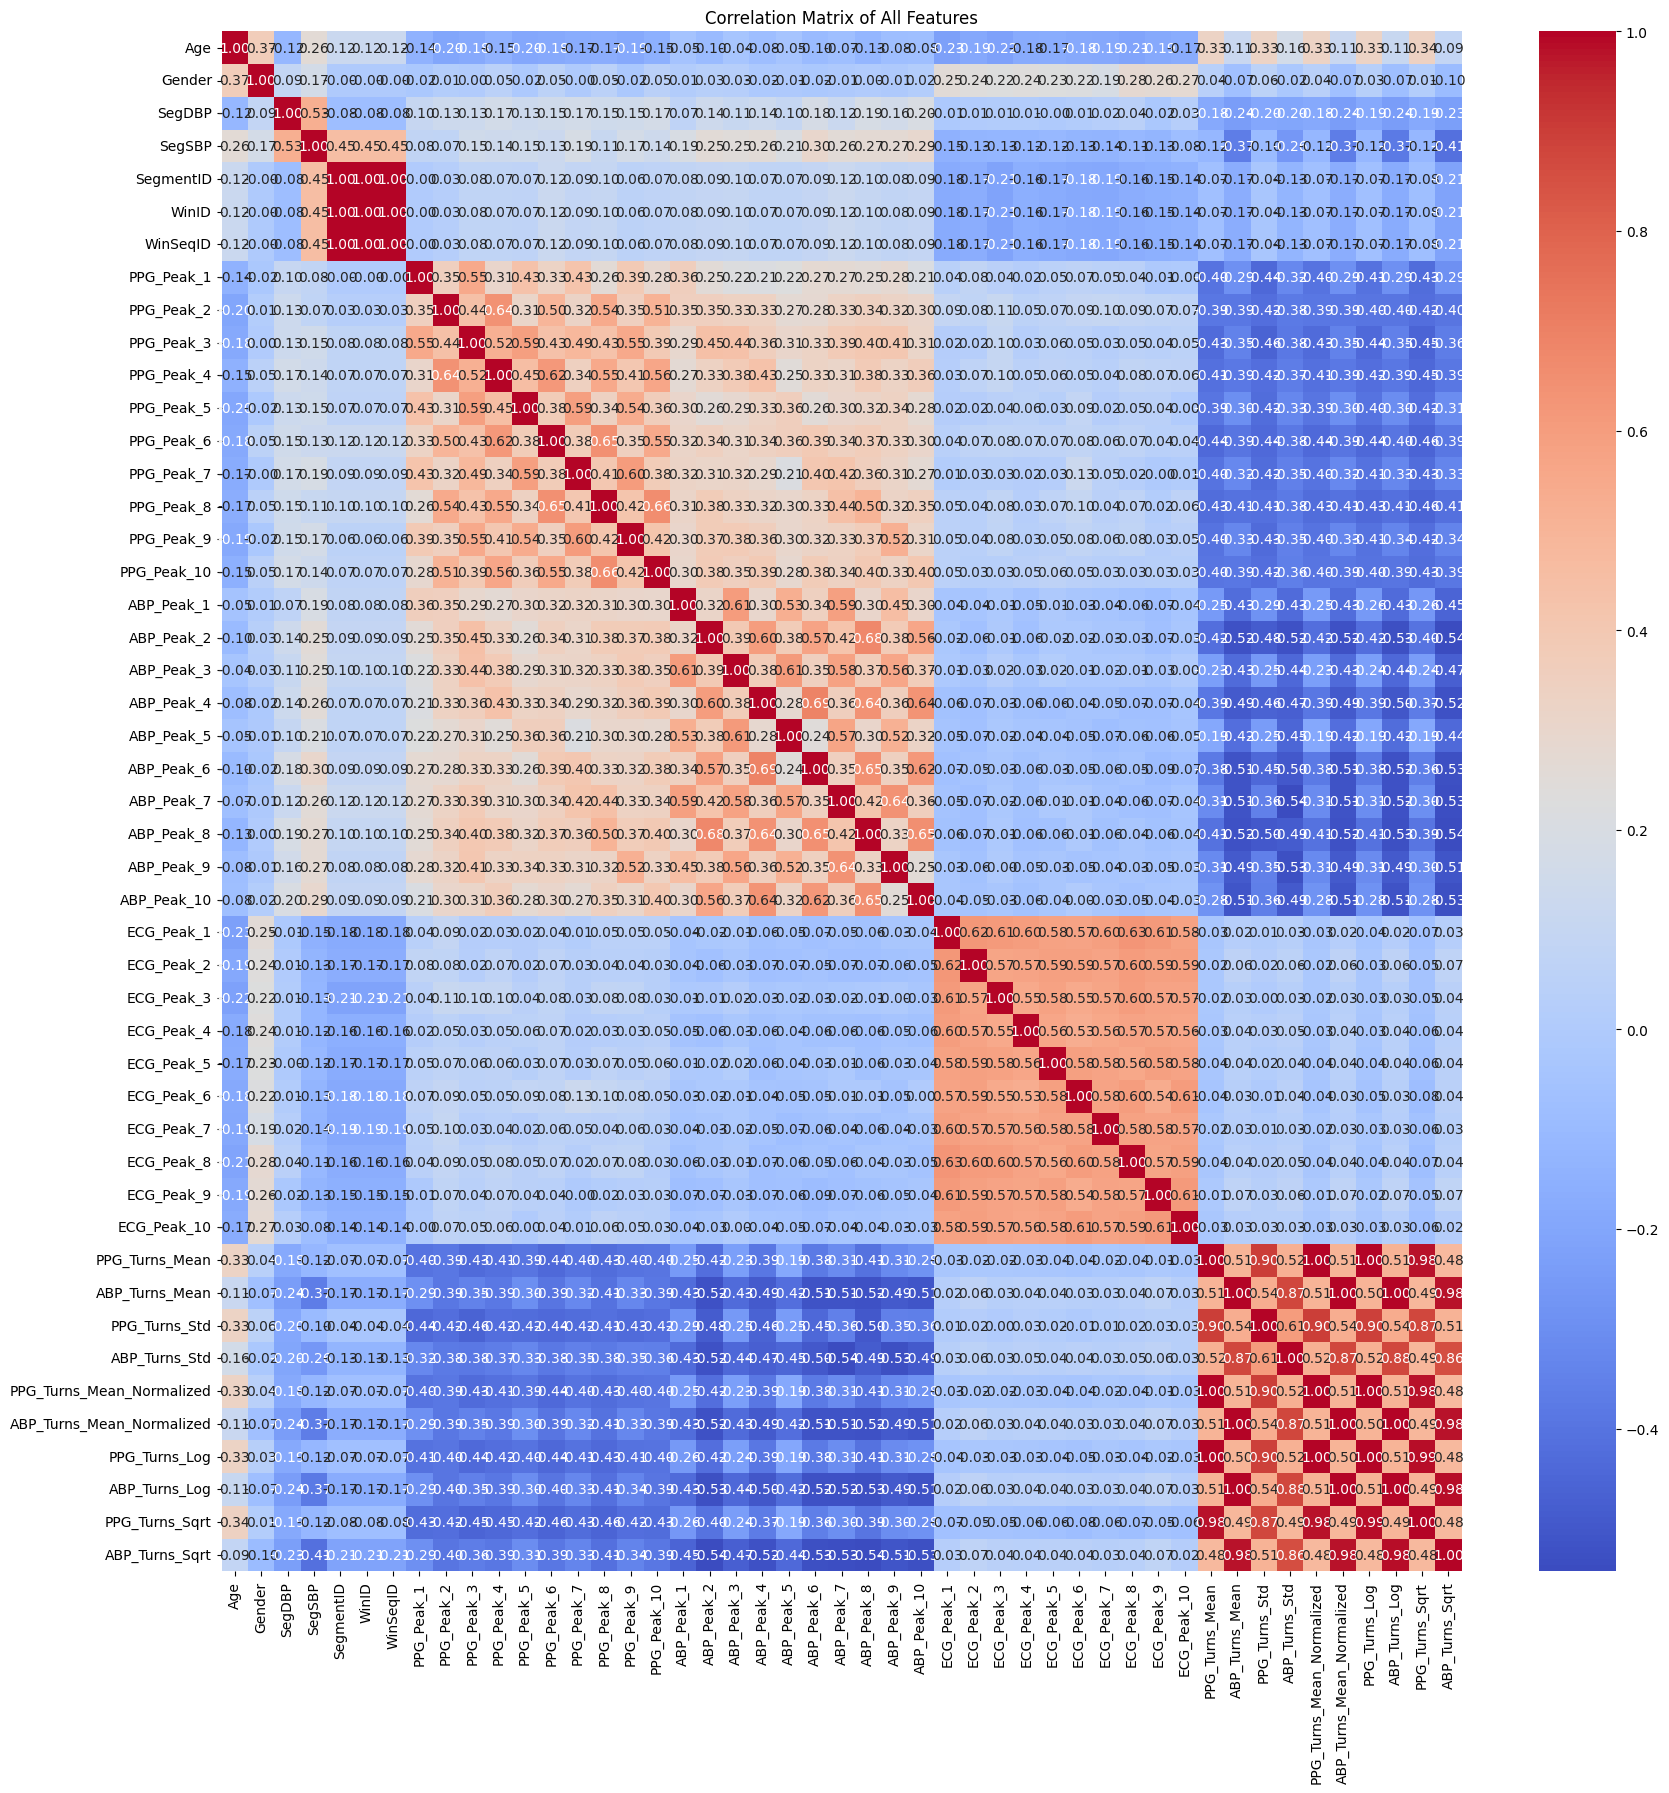

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for the entire dataset
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()


In [ ]:
data.dtypes

Age                          float64
Gender                         int64
SegDBP                       float64
SegSBP                       float64
SegmentID                    float64
WinID                        float64
WinSeqID                     float64
PPG_Peak_1                   float64
PPG_Peak_2                   float64
PPG_Peak_3                   float64
PPG_Peak_4                   float64
PPG_Peak_5                   float64
PPG_Peak_6                   float64
PPG_Peak_7                   float64
PPG_Peak_8                   float64
PPG_Peak_9                   float64
PPG_Peak_10                  float64
ABP_Peak_1                   float64
ABP_Peak_2                   float64
ABP_Peak_3                   float64
ABP_Peak_4                   float64
ABP_Peak_5                   float64
ABP_Peak_6                   float64
ABP_Peak_7                   float64
ABP_Peak_8                   float64
ABP_Peak_9                   float64
ABP_Peak_10                  float64
E

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Assuming 'data' is your DataFrame and 'Target1', 'Target2' are the continuous target variables
X = data.drop(['SegDBP', 'SegSBP'], axis=1)
y = data[['SegDBP', 'SegSBP']]

# Initialize the RandomForestRegressor
forest = RandomForestRegressor()

# Wrap it in a MultiOutputRegressor
model = MultiOutputRegressor(forest)
model.fit(X, y)

# Get the feature importances
# This will give you a list of importances for each target
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importances = importances.mean(axis=0)
indices = np.argsort(mean_importances)[::-1]

# Print the feature rankings based on mean importance across both targets
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({mean_importances[indices[f]]})")


Feature ranking:
1. feature Age (0.27393620079174597)
2. feature ABP_Peak_10 (0.050839400449083416)
3. feature SegmentID (0.04780504728082934)
4. feature WinSeqID (0.0474910452742082)
5. feature WinID (0.04109452675166441)
6. feature ABP_Turns_Std (0.04063725704349834)
7. feature PPG_Turns_Std (0.02260800456256539)
8. feature ABP_Turns_Mean (0.021704338679681565)
9. feature ABP_Turns_Sqrt (0.019522892437625852)
10. feature ABP_Turns_Log (0.018814279512258357)
11. feature ECG_Peak_6 (0.018531931914602687)
12. feature ABP_Peak_6 (0.018089485441067123)
13. feature ABP_Peak_9 (0.017965642235341937)
14. feature ECG_Peak_10 (0.01781339509270721)
15. feature ABP_Turns_Mean_Normalized (0.0175016189752829)
16. feature ECG_Peak_1 (0.01699366108287531)
17. feature ECG_Peak_2 (0.016962539665374678)
18. feature ABP_Peak_2 (0.01636721287337111)
19. feature ECG_Peak_7 (0.01630946623769066)
20. feature ECG_Peak_8 (0.01588882532856842)
21. feature ECG_Peak_3 (0.015824078726318462)
22. feature Gender (0

**3. Model Training**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, data[['SegDBP', 'SegSBP']], test_size=0.2, random_state=42)

# Separating the targets
y_train_target1 = y_train['SegDBP']
y_train_target2 = y_train['SegSBP']
y_test_target1 = y_test['SegDBP']
y_test_target2 = y_test['SegSBP']

# Training the first XGBoost model for the first target
model_target1 = XGBRegressor(objective='reg:squarederror')
model_target1.fit(X_train, y_train_target1)

# Predicting the test set results for the first target
y_pred_target1 = model_target1.predict(X_test)
mse_target1 = mean_squared_error(y_test_target1, y_pred_target1)
print(f"Mean Squared Error for Target 1: {mse_target1}")

# Training the second XGBoost model for the second target
model_target2 = XGBRegressor(objective='reg:squarederror')
model_target2.fit(X_train, y_train_target2)

# Predicting the test set results for the second target
y_pred_target2 = model_target2.predict(X_test)
mse_target2 = mean_squared_error(y_test_target2, y_pred_target2)
print(f"Mean Squared Error for Target 2: {mse_target2}")


Mean Squared Error for Target 1: 0.20734859790414858
Mean Squared Error for Target 2: 1.5705220371986757
